# **Data cleaning and transforming **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv(r'/content/drive/MyDrive/sales_data_sample.csv',  encoding='latin-1')
df['ORDER NUMBER'] = df['ORDER NUMBER'].astype('str')
df['ORDER LINE NUMBER'] = df['ORDER LINE NUMBER'].astype('str')

df['ORDER DATE'] = pd.to_datetime(df['ORDER DATE']) # Convert 'ORDER DATE' to datetime (Standardizing Data Format)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ORDER NUMBER       2823 non-null   object        
 1   QUANTITY ORDERED   2823 non-null   int64         
 2   PRICE EACH         2823 non-null   float64       
 3   ORDER LINE NUMBER  2823 non-null   object        
 4   SALES              2823 non-null   float64       
 5   ORDER DATE         2823 non-null   datetime64[ns]
 6   STATUS             2823 non-null   object        
 7   QTR_ID             2823 non-null   int64         
 8   MONTH_ID           2823 non-null   int64         
 9   YEAR_ID            2823 non-null   int64         
 10  PRODUCTLINE        2823 non-null   object        
 11  MSRP               2823 non-null   int64         
 12  PRODUCTCODE        2823 non-null   object        
 13  CUSTOMER NAME      2823 non-null   object        
 14  PHONE   

In [ ]:
df.isnull().sum()
# this step to be certain how many coulmn we have that has high number of nulls

Unnamed: 0                   0
ORDER NUMBER                 0
QUANTITY ORDERED             0
PRICE EACH                   0
ORDER LINE NUMBER            0
SALES                        0
ORDER DATE                   0
STATUS                       0
QTR_ID                       0
MONTH_ID                     0
YEAR_ID                      0
PRODUCTLINE                  0
MSRP                         0
PRODUCTCODE                  0
CUSTOMER NAME                0
PHONE                        0
ADDRESSLINE1                 0
ADDRESSLINE2              2521
CITY                         0
STATE                     1486
POSTALCODE                  76
COUNTRY                      0
TERRITORY                    0
CONTACTLASTNAME              0
CONTACTFIRSTNAME             0
DEALSIZE                     0
Year                         0
Month_Name                   0
MM-Year                      0
Quarter_for_every_year       0
dtype: int64

In [ ]:
# to Filter Rows with Missing 'TERRITORY'
# Identify Unique Countries with Missing 'TERRITORY'
Null_territory = df[df['TERRITORY'].isna()]
countries_with_Null_territory = Null_territory['COUNTRY'].unique()
print(countries_with_Null_territory)

['USA' 'Canada']


In [ ]:
#The USA and Canada  belong to the same Territory "AMER" we can fill the missing values up with ''AMER'
df["TERRITORY"] = df["TERRITORY"].fillna("AMER")

In [ ]:
df['TERRITORY'].unique()
#after filling up the missing territory values 'AMER' was add to the territory list
# USA and japan are countries not territories so it will have to be replaced

array(['AMER', 'EMEA', 'APAC'], dtype=object)

In [ ]:
df['TERRITORY']= df['TERRITORY'].replace('USA','AMER')
df['TERRITORY']= df['TERRITORY'].replace('Japan','APAC')
df['TERRITORY'].unique()
#japan belongs to APAC territory and USA belongs to AMER so they were replaced with APAC and AMER

array(['AMER', 'EMEA', 'APAC'], dtype=object)

In [ ]:
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Medium


In [ ]:
Null_states = df[df['STATE'].isna()]

countries_with_Null_state = Null_states['COUNTRY'].unique()
print(countries_with_Null_state)
# we have many countries with high number of missing states and it will be hard to identify each missing state and it won't affect our analysis so no need
#for the state column

['France' 'Norway' 'Finland' 'Australia' 'UK' 'Spain' 'Sweden' 'Singapore'
 'Italy' 'Denmark' 'Belgium' 'Philippines' 'Germany' 'Switzerland'
 'Ireland']


In [ ]:
# Remove the unnecessary coulmns
df= df.drop(['PHONE','STATE', 'POSTALCODE'
,'CONTACTLASTNAME','CONTACTFIRSTNAME','ADDRESSLINE1','ADDRESSLINE2'], axis=1)

df.head()


,Unnamed: 0,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,...,PRODUCTCODE,CUSTOMER NAME,CITY,COUNTRY,TERRITORY,DEALSIZE,Year,Month_Name,MM-Year,Quarter_for_every_year
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,S10_1678,Land of Toys Inc.,NYC,USA,AMER,Small,2003,Feb,2003-02,q1-2003
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,S10_1678,Reims Collectables,Reims,France,EMEA,Small,2003,May,2003-05,q2-2003
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,S10_1678,Lyon Souveniers,Paris,France,EMEA,Medium,2003,Jul,2003-07,q3-2003
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,S10_1678,Toys4GrownUps.com,Pasadena,USA,AMER,Medium,2003,Aug,2003-08,q3-2003
4,4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,AMER,Medium,2003,Oct,2003-10,q4-2003


## **Analysis and exploration**

In [ ]:
df['STATUS'].unique()
#we have 6 shipping status

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [ ]:
df['YEAR_ID'].value_counts()
#so we have data of three years ....the data of 2005 is incomplete

YEAR_ID
2004    1345
2003    1000
2005     478
Name: count, dtype: int64




***sales by product Line***

In [ ]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [ ]:
len(df['PRODUCTLINE'].unique())#we have 7 lines

7

In [ ]:
#high-performing products
the_Best_selling_productLine=pd.DataFrame(df.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(5))
the_Best_selling_productLine.reset_index(inplace=True)

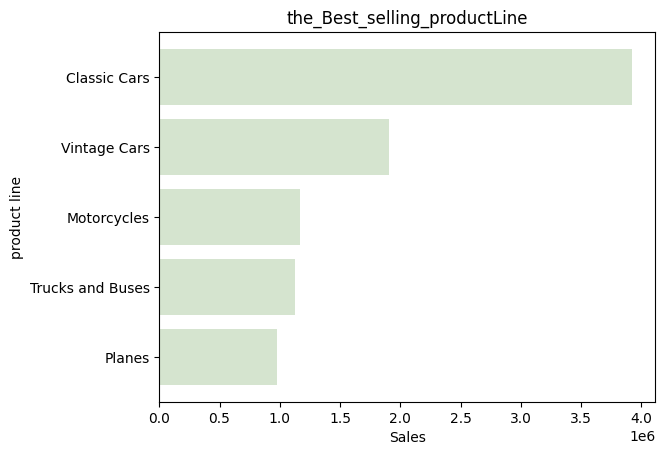

In [ ]:
plt.barh(y=the_Best_selling_productLine['PRODUCTLINE'],width=the_Best_selling_productLine['SALES'],color='#D5E4CF')
plt.xlabel('Sales')
plt.ylabel('product line')
plt.title('the_Best_selling_productLine')
plt.show()

***Sales By Country***

In [ ]:
len(df['CITY'].unique())

73

In [ ]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [ ]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [ ]:
Top_selling_country=pd.DataFrame(df.groupby('COUNTRY')['SALES'].agg('sum').sort_values(ascending=False).head(5))
Top_selling_country.reset_index(inplace=True)
Top_selling_country

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46


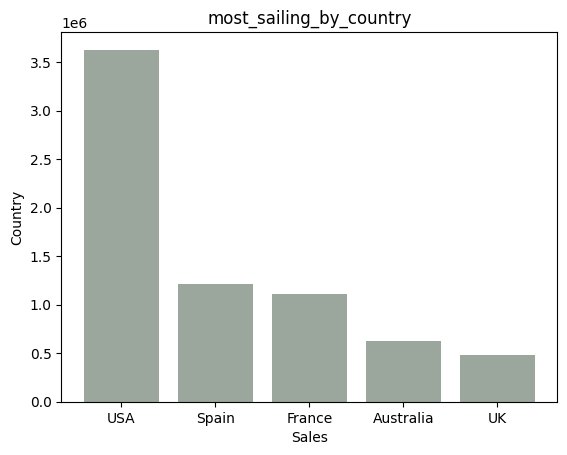

In [ ]:
plt.bar(Top_selling_country['COUNTRY'],Top_selling_country['SALES'],color='#9BA79C')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.title('Top_selling_country')
plt.show()

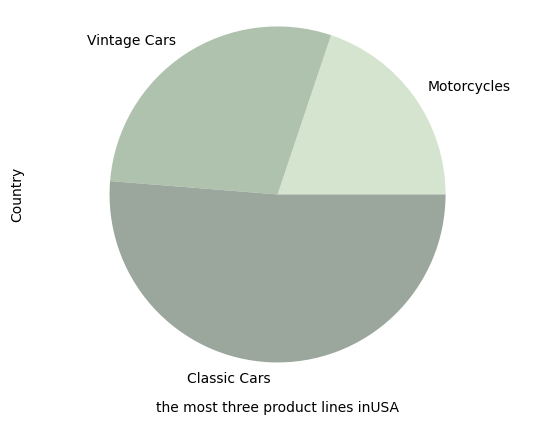

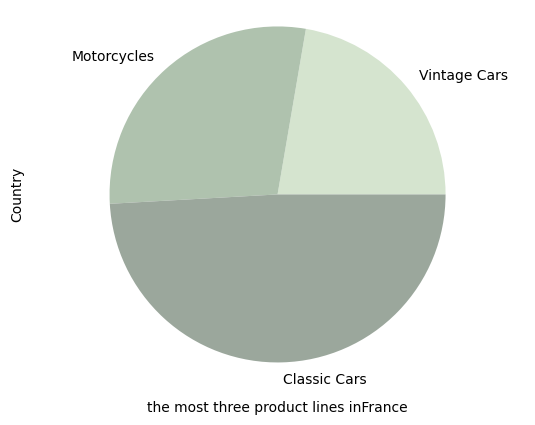

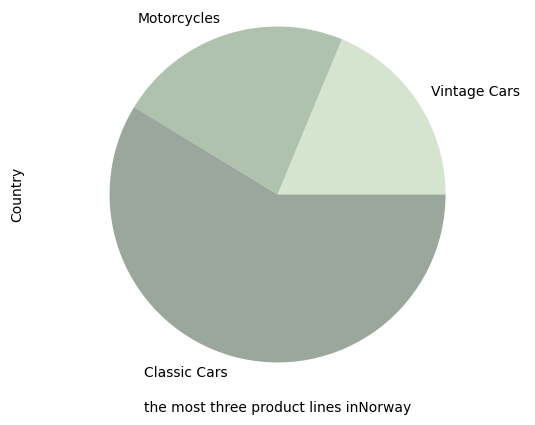

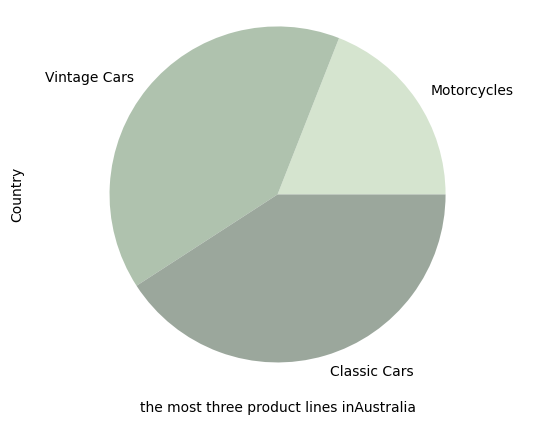

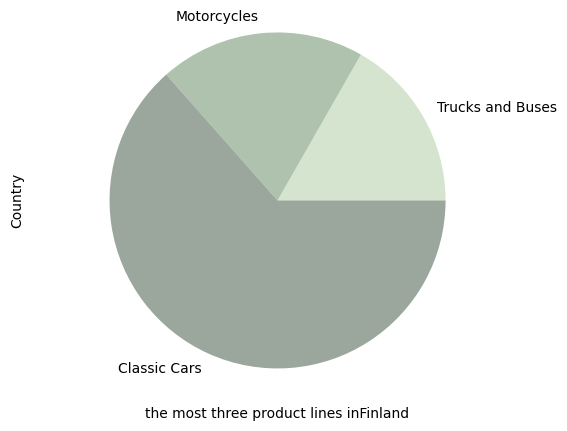

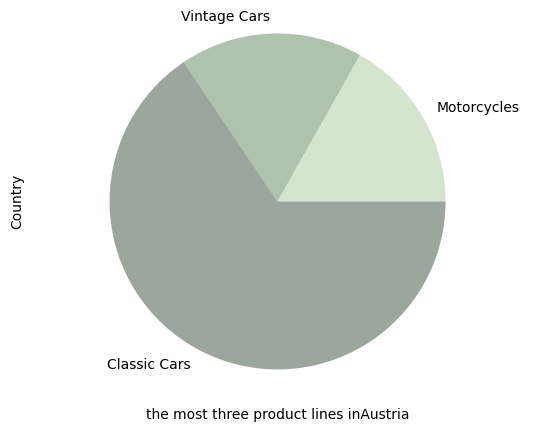

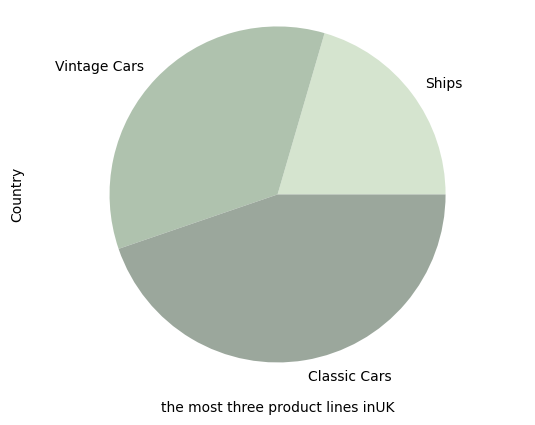

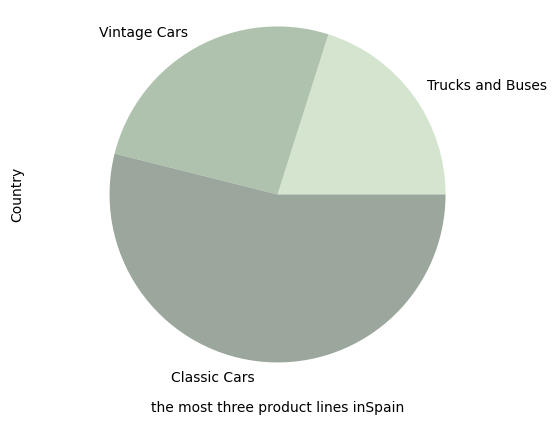

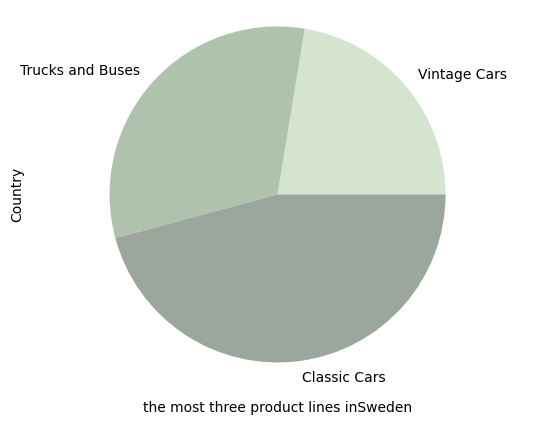

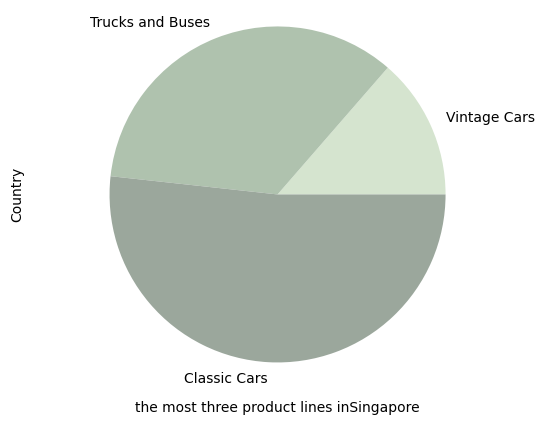

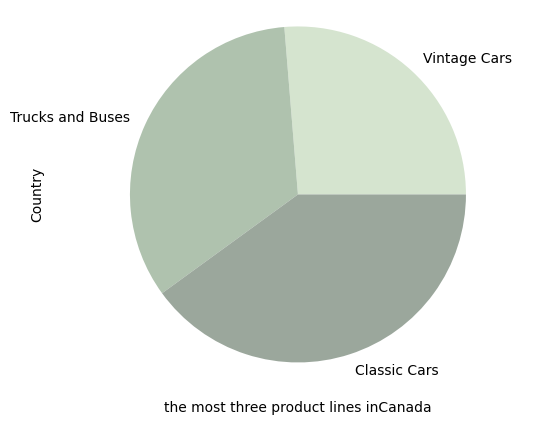

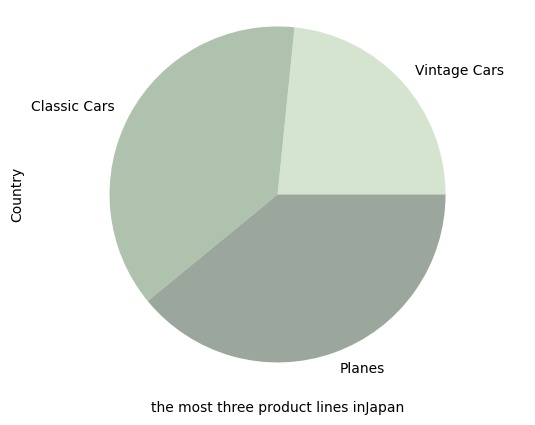

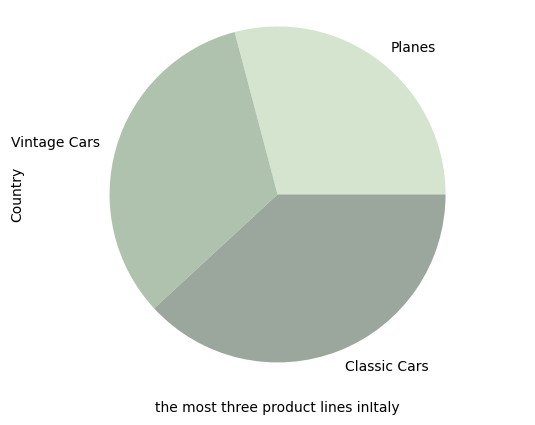

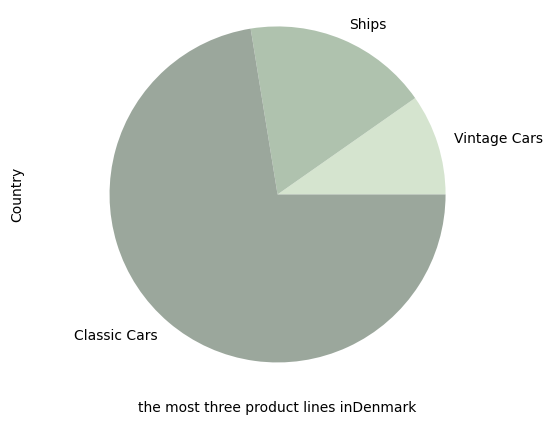

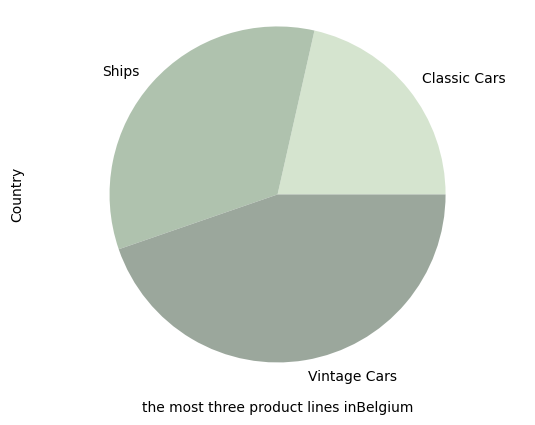

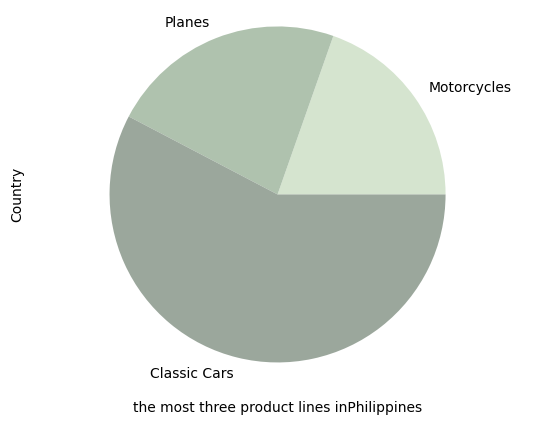

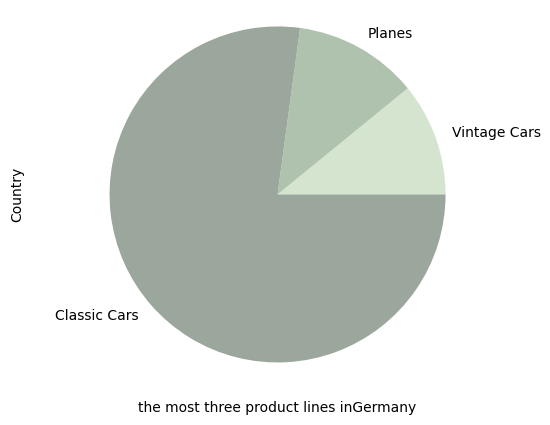

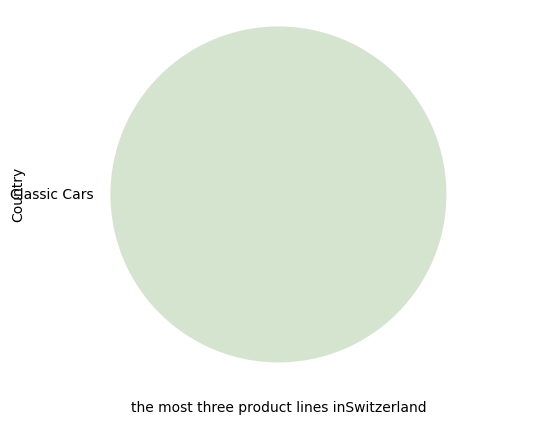

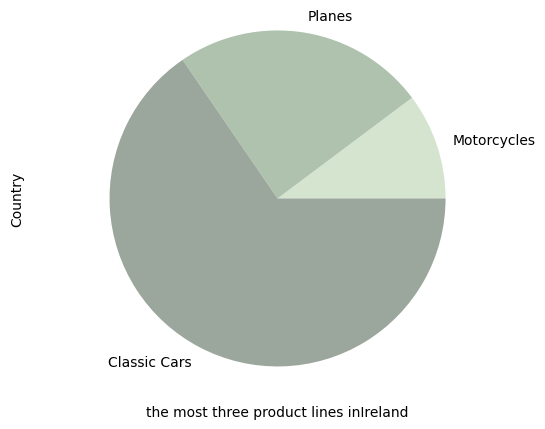

In [5]:
#most popular product line for every country
countries=df['COUNTRY'].unique()
for country in countries:
    countries_dataFrame=df[df['COUNTRY']==country]
    countries_dataFrame=pd.DataFrame(countries_dataFrame.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(3))
    countries_dataFrame.reset_index(inplace=True)
    plt.pie(countries_dataFrame['SALES'], labels=countries_dataFrame['PRODUCTLINE'],colors=['#D5E4CF','#AFC2AE','#9BA79C'])
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
    plt.xlabel('\nthe most three product lines in'+country)
    plt.ylabel('Country')
    plt.show()

**Time Series Analysis**

In [12]:
#sales trend for every year
year_trend=pd.DataFrame(df.groupby('Year')['SALES'].sum().sort_values(ascending=False))
year_trend.reset_index(inplace=True)
year_trend
#type(year_trend['Year'])

,Year,SALES
0,2004,4724162.60
1,2003,3516979.54
2,2005,1791486.71


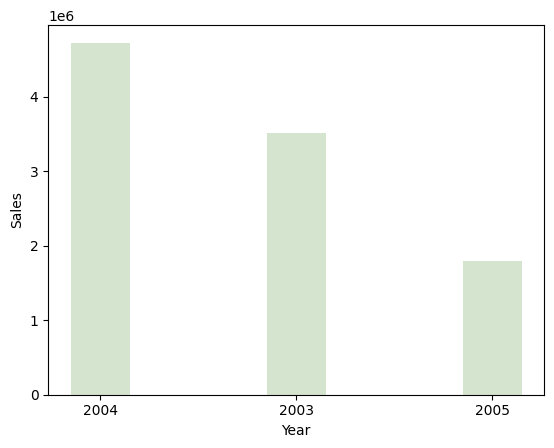

In [17]:
plt.bar(year_trend['Year'],year_trend['SALES'], color='#D5E4CF',width = 0.3 )
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [18]:
#Monthly sales trends
df['Month_Name'] = df['ORDER DATE'].dt.strftime('%B')  # Extract month name from 'ORDER DATE'

monthly_trend=pd.DataFrame(df.groupby('Month_Name')['SALES'].sum().sort_values(ascending=False))
monthly_trend.reset_index(inplace=True)
monthly_trend

,Month_Name,SALES
0,November,2118885.67
1,October,1121215.22
2,May,923972.56
3,February,810441.90
4,January,785874.44
5,March,754501.39
6,April,669390.96
7,August,659310.57
8,December,634679.12
9,September,584724.27


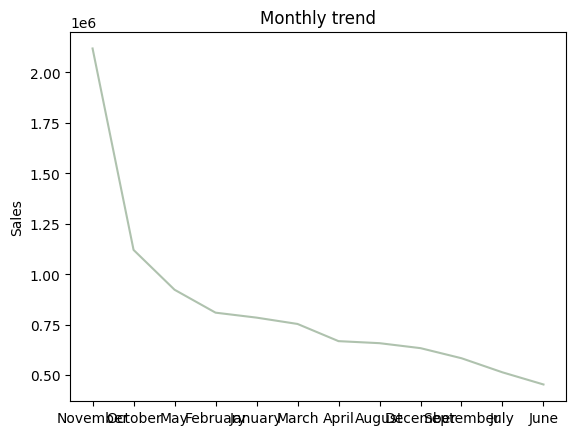

In [19]:
plt.plot(monthly_trend['Month_Name'],monthly_trend['SALES'],color="#AFC2AE")
plt.ylabel('Sales')
plt.title("Monthly trend")
plt.show()
#after nov there is decreasing in sales

***top product lines for every year & Which Year the product line achieve its selling***

In [ ]:
df.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].agg('sum')

YEAR_ID  PRODUCTLINE     
2003     Classic Cars        1484785.29
         Motorcycles          370895.58
         Planes               272257.60
         Ships                244821.09
         Trains                72802.29
         Trucks and Buses     420429.93
         Vintage Cars         650987.76
2004     Classic Cars        1762257.09
         Motorcycles          560545.23
         Planes               502671.80
         Ships                341437.97
         Trains               116523.85
         Trucks and Buses     529302.89
         Vintage Cars         911423.77
2005     Classic Cars         672573.28
         Motorcycles          234947.53
         Planes               200074.17
         Ships                128178.07
         Trains                36917.33
         Trucks and Buses     178057.02
         Vintage Cars         340739.31
Name: SALES, dtype: float64

In [29]:
#Top 2 product lines for every year
print("Top selling two product Lines for every Year\n ")
for year in df['Year'].unique():
    data_for_every_year=df.loc[df['Year']==year]
    top_Product_Line=data_for_every_year.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(2)
    print(f'''Year : {year} \n {top_Product_Line}''')

Top selling two product Lines for every Year
 
Year : 2003 
 PRODUCTLINE
Vintage Cars     650987.76
Classic Cars    1484785.29
Name: SALES, dtype: float64
Year : 2004 
 PRODUCTLINE
Vintage Cars     911423.77
Classic Cars    1762257.09
Name: SALES, dtype: float64
Year : 2005 
 PRODUCTLINE
Vintage Cars    340739.31
Classic Cars    672573.28
Name: SALES, dtype: float64


**Customer analysis**

In [ ]:
#Most valuable Customers and there preferable products
most_valuable_customrs=pd.DataFrame(df.groupby('CUSTOMER NAME')['SALES'].agg('sum').sort_values().tail(10))
most_valuable_customrs.reset_index(inplace=True)
most_valuable_customrs

,CUSTOMER NAME,SALES
0,"Anna's Decorations, Ltd",153996.13
1,"AV Stores, Co.",157807.81
2,The Sharp Gifts Warehouse,160010.27
3,Land of Toys Inc.,164069.44
4,"Dragon Souveniers, Ltd.",172989.68
5,La Rochelle Gifts,180124.90
6,Muscle Machine Inc,197736.94
7,"Australian Collectors, Co.",200995.41
8,Mini Gifts Distributors Ltd.,654858.06
9,Euro Shopping Channel,912294.11


In [ ]:
customers=most_valuable_customrs['CUSTOMER NAME']
for customer in customers:
    most_valuable=df[df['CUSTOMER NAME']==customer]
    most_valuable=pd.DataFrame(most_valuable.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(2))
    most_valuable.reset_index(inplace=True)
    print(f"{customer} his preferable products\n{most_valuable['PRODUCTLINE']}")

Anna's Decorations, Ltd his preferable products
0    Vintage Cars
1    Classic Cars
Name: PRODUCTLINE, dtype: object
AV Stores, Co. his preferable products
0    Classic Cars
1    Vintage Cars
Name: PRODUCTLINE, dtype: object
The Sharp Gifts Warehouse his preferable products
0    Classic Cars
1    Vintage Cars
Name: PRODUCTLINE, dtype: object
Land of Toys Inc. his preferable products
0    Classic Cars
1     Motorcycles
Name: PRODUCTLINE, dtype: object
Dragon Souveniers, Ltd. his preferable products
0    Trucks and Buses
1        Classic Cars
Name: PRODUCTLINE, dtype: object
La Rochelle Gifts his preferable products
0    Motorcycles
1         Planes
Name: PRODUCTLINE, dtype: object
Muscle Machine Inc his preferable products
0    Trucks and Buses
1        Classic Cars
Name: PRODUCTLINE, dtype: object
Australian Collectors, Co. his preferable products
0    Classic Cars
1     Motorcycles
Name: PRODUCTLINE, dtype: object
Mini Gifts Distributors Ltd. his preferable products
0    Vintage Cars


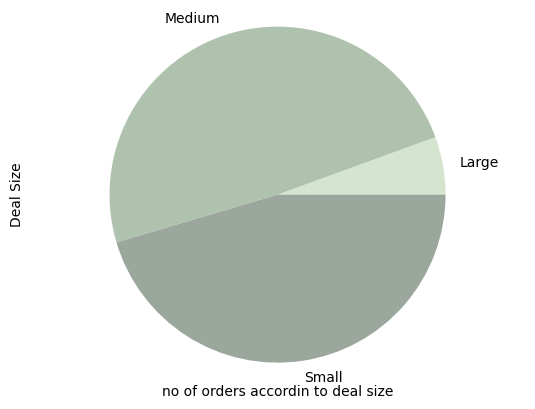

In [ ]:
#or analyzing order sizes.
order_Sizes=pd.DataFrame(df.groupby('DEALSIZE')['ORDER NUMBER'].agg('count'))
order_Sizes.reset_index(inplace=True)
plt.pie(order_Sizes['ORDER NUMBER'], labels=order_Sizes['DEALSIZE'],colors=['#D5E4CF','#AFC2AE','#9BA79C'])
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.xlabel('no of orders accordin to deal size')
plt.ylabel('Deal Size')
plt.show()

<Axes: >

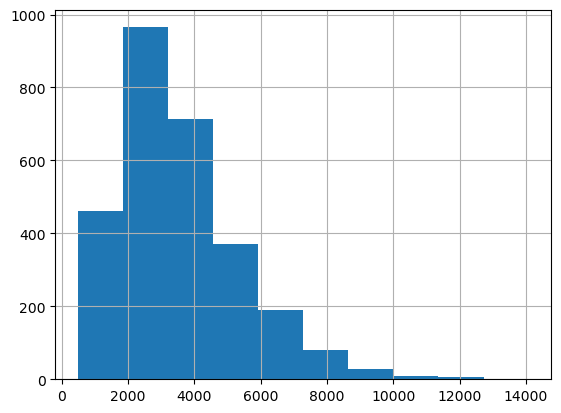

In [ ]:
df['SALES'].hist()

In [ ]:
df.to_csv(r'C:\Users\MM\OneDrive\Desktop\DEPI_Graduation_Project\DataSet_Before_Preparation\sales_data_sample.csv')